# HW1
## TODO:  Your ID goes here: 209089531 | 318835550

#### TODO: You emails for here: galmeir@post.bgu.ac.il |  bennaeht@post.bgu.ac.il

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.

## Submission
The deadline for the task is 16.06.2024.
You may work alone or in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Regarding Accuracy:
You must reach over 60% on each test set. Other than that, you are **NOT** graded on accuracy.

## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [348]:
### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y



def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [349]:
### Your code goes here (you may break this part to more than one cell) ####
### Imports
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [350]:
### Preprocessing function ###
def pre(data):
  d = torch.Tensor(data).to("cuda")
  return d

In [351]:
### Training function ###
def train(model, X, y, optimizer, criterion, epochs_num):
  los = np.array([])
  for epoch in tqdm(range(epochs_num)):
    # no batches, predict the entire set
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    los = np.append(los ,loss.item())
  return model, los

In [352]:
### Plot training loss function ###

def plt_los(losses):
  plt.plot(losses)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.grid()
  plt.show()

In [353]:
### Plot predicted labels and decision boundaries ###

def pred_and_des(model, X_train, lx, hx, ly, hy, device):
  # for decision boundary
#  y = np.zeros(100*3, dtype='uint8') # class labels
  lim_axis = 1.1
  xs = torch.linspace(lx, hx, steps=100)
  ys = torch.linspace(ly, hy, steps=100)
  xx_m, yy_m = torch.meshgrid(xs, ys, indexing='xy')
  xx, yy = xx_m.ravel(), yy_m.ravel()
  xy_coord = torch.stack([xx, yy], dim=1)
  X_train_np = X_train.cpu().numpy()

  # for plot
  xx_m, yy_m = xx_m.numpy(), yy_m.numpy()

  y_pred = model(X_train).detach().cpu().numpy()
  y_pred = np.argmax(y_pred, axis=1)
  # lets visualize the data:
  decision_bound = model(xy_coord.to(device)).detach().cpu().numpy()
  decision_bound = np.argmax(decision_bound, axis=1)
  plt.scatter(xx_m, yy_m, c=decision_bound, cmap=plt.cm.Spectral)
  plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=y_pred, s=40, cmap=plt.cm.Spectral, edgecolors='black')
  plt.show()


In [354]:
### Evaluation function ###
def eval_func(model, x, y, st):
  y_pred = model(x).detach().cpu().numpy()
  y_pred = np.argmax(y_pred, axis=1)
  y_target = y.detach().cpu().numpy()
  ans = np.mean(y_pred == y_target)
  print(f"{st} accuracy: {ans}")

## EX1

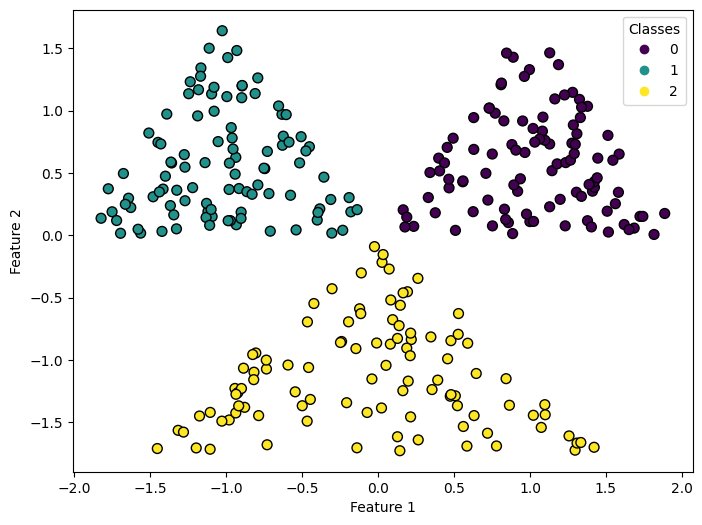

In [355]:
# Generate the data
x_train, y_train = generate_symmetric_triangles_data(random_state=0)
x_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(x_train, y_train)

In [356]:
### Your code goes here ####
criterion = nn.NLLLoss()
device = "cuda"

input_size = 2
output_size = 3
model = nn.Sequential(nn.Linear(input_size, output_size
                                ),
                      # LogSoftmax + negative log liklihood loss
                      # OR linear + CrossEntropy loss
                      nn.LogSoftmax(dim=1))

model = model.to(device)


opt = optim.SGD(model.parameters(), lr=1, weight_decay=0.001)

**Model Explanation**.

 The data is distributed in a linear way, so one layer would be enough to classify, and there is no need for breakpoints.


In [357]:
x_train = pre(x_train)
y_train = pre(y_train).long()
x_test = pre(x_test)
y_test = pre(y_test).long()

In [358]:
num_epochs = 100
model, loss = train(model, x_train, y_train, opt, criterion, num_epochs)

100%|██████████| 100/100 [00:00<00:00, 937.60it/s]


Training accuracy: 1.0


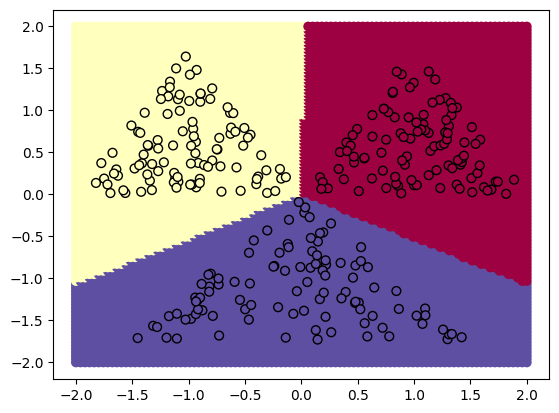

In [359]:
eval_func(model,x_train, y_train, "Training")
pred_and_des(model,x_train, -2, 2, -2 ,2, device)

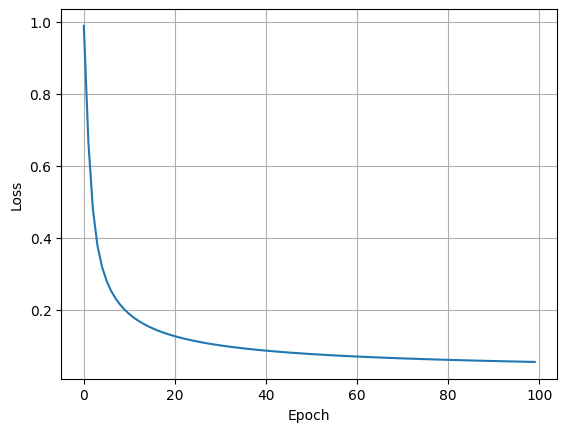

In [360]:
plt_los(loss)

Test accuracy: 0.9966666666666667


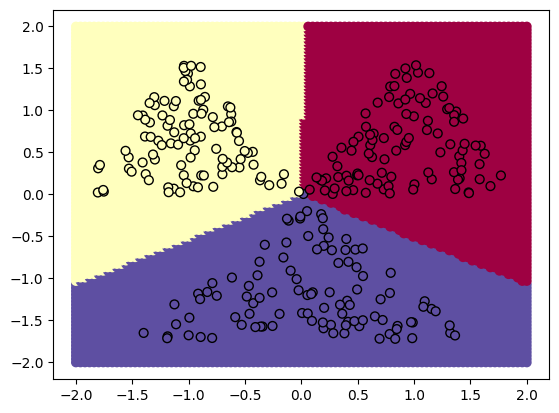

In [361]:
eval_func(model,x_test, y_test, "Test")
pred_and_des(model,x_test, -2, 2, -2 ,2, device)

**Markdown**

our model performed well, because of the structure of the data, that can be separated with a straight line. We defined the output size to be 3 because there are 3 different classes for the classification task.


## EX2

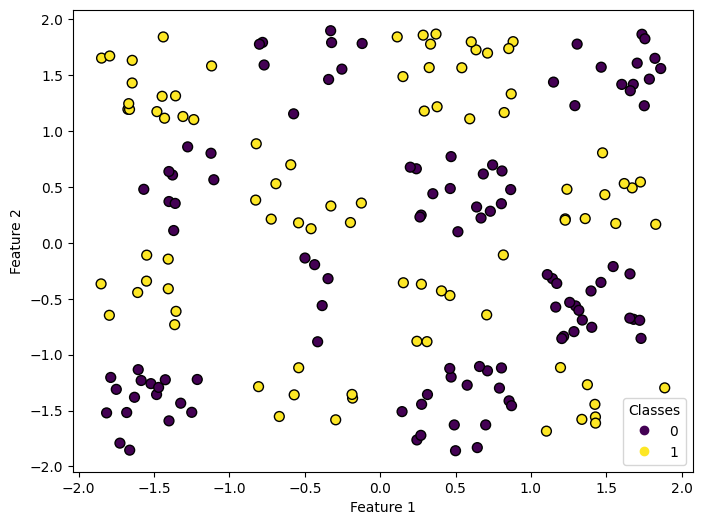

In [362]:
# Generate the data
x_train, y_train = generate_grid_data(random_state=0)
x_test, y_test = generate_grid_data(random_state=1)


# Plot the data
plot_data(x_train, y_train)

In [363]:
### Your code goes here ####
criterion = nn.NLLLoss()
device = "cuda"

hidden_size = 20
output_size = 2
input_size = 2
model = nn.Sequential(nn.Linear(input_size, 32),
                      nn.ReLU(),
                      nn.Linear(32, 16),
                      nn.ReLU(),
                      nn.Linear(16, output_size),
                      nn.LogSoftmax(dim=1))

model = model.to(device)


opt = optim.Adam(model.parameters(), lr=0.1)

**Model Explanation**

We chose MLP because the data is not distributed in a linear way. We need MLP to create piecewise linear functions.


In [364]:
x_train = pre(x_train)
y_train = pre(y_train).long()
x_test = pre(x_test)
y_test = pre(y_test).long()


In [365]:
num_epochs = 300
model, loss = train(model, x_train, y_train, opt, criterion, num_epochs)

100%|██████████| 300/300 [00:00<00:00, 660.78it/s]


Training accuracy: 1.0


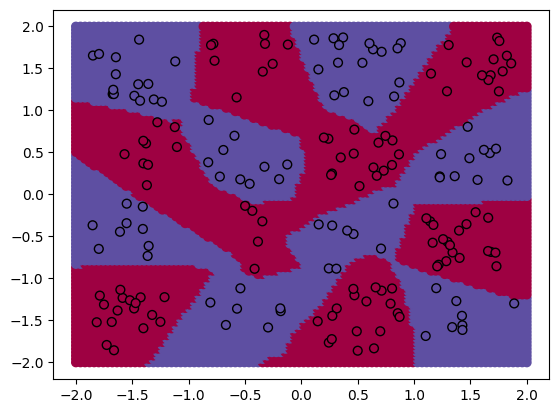

In [366]:
eval_func(model,x_train, y_train, "Training")
pred_and_des(model,x_train, -2, 2, -2 ,2, device)

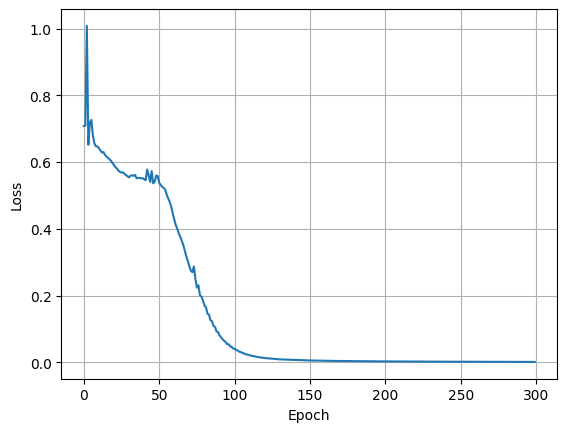

In [367]:
plt_los(loss)

Test accuracy: 0.9197860962566845


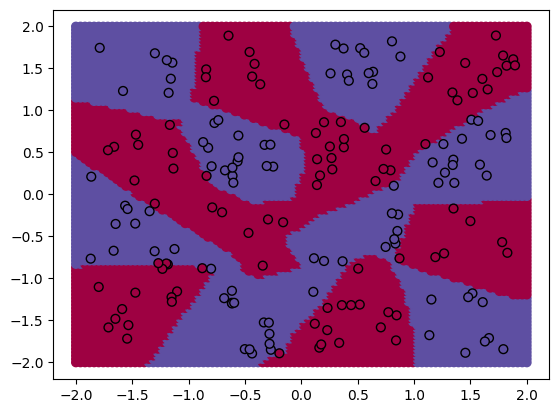

In [368]:
eval_func(model,x_test, y_test, "Test")
pred_and_des(model,x_test, -2, 2, -2 ,2, device)

**Markdown**

Our model performed well because we added more hidden units and layers to make the function piecewise linear, so it will capture the data distribution more accurately. We defined the output size to be 2 because there are 2 different classes for the classification task.


## EX3

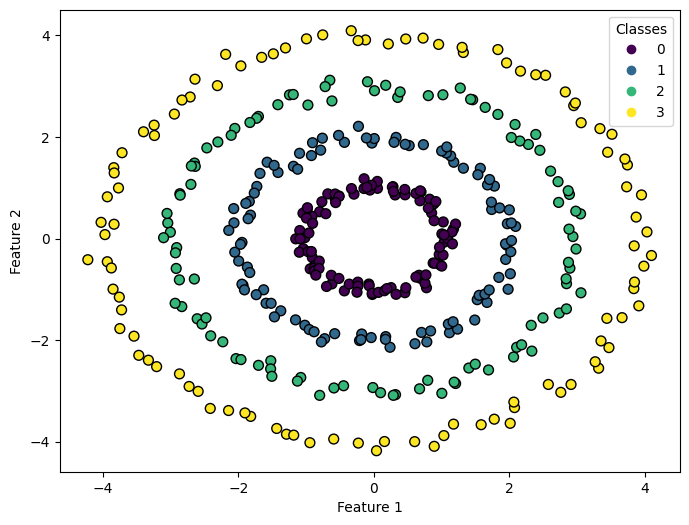

In [369]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


In [370]:
### Your code goes here ####
criterion = nn.NLLLoss()
device = "cuda"

hidden_size = 20
output_size = 4
input_size = 2
model = nn.Sequential(nn.Linear(input_size, 128),
                      nn.ReLU(),
                      nn.Linear(128, 32),
                      nn.ReLU(),
                      nn.Linear(32, output_size),
                      #nn.ReLU(),
                      #nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))

model = model.to(device)


opt = optim.Adam(model.parameters(), lr=0.1)

**Model Explanation**

We chose MLP because the data is not distributed in a linear way. We need MLP to create piecewise linear functions.


In [371]:
x_train = pre(X_train)
y_train = pre(y_train).long()
x_test = pre(X_test)
y_test = pre(y_test).long()

In [372]:
num_epochs = 100
model, loss = train(model, x_train, y_train, opt, criterion, num_epochs)

100%|██████████| 100/100 [00:00<00:00, 654.14it/s]


Training accuracy: 1.0


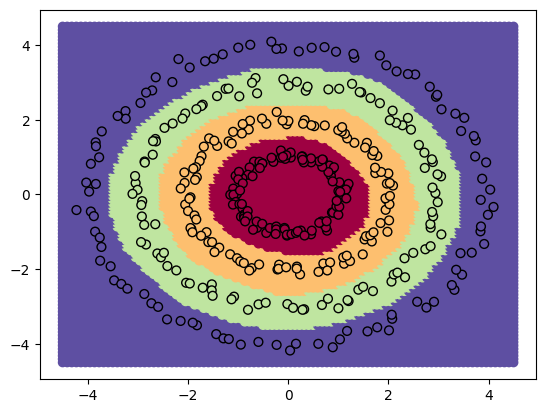

In [373]:
eval_func(model,x_train, y_train, "Training")
pred_and_des(model,x_train, -4.5, 4.5, -4.5 , 4.5, device)

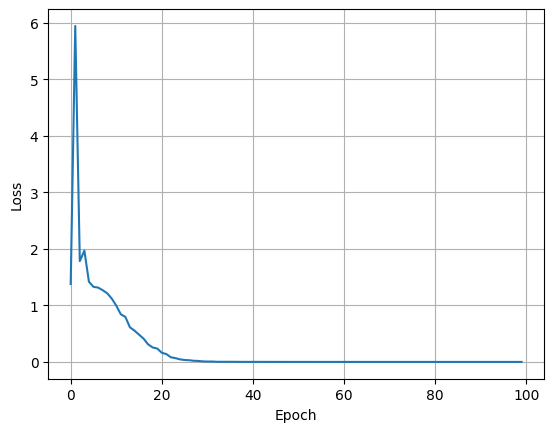

In [374]:
plt_los(loss)

Test accuracy: 1.0


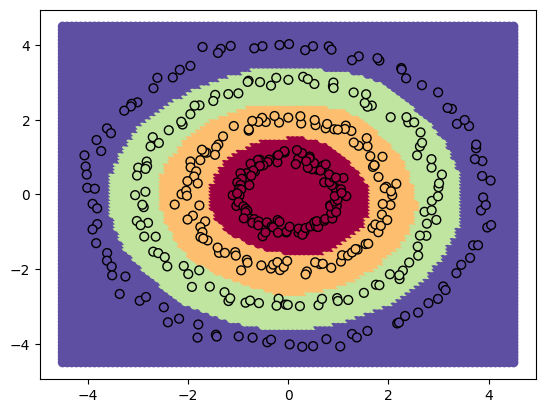

In [375]:
eval_func(model,x_test, y_test, "Test")
pred_and_des(model,x_test, -4.5, 4.5, -4.5 , 4.5, device)

**Markdown**

Our model performed well because we added even more hidden units and to make the function more accurate with the “circular” way the data is distributed which requires even more breaking points. We defined the output size to be 4 because there are 4 different classes for the classification task.


## EX4

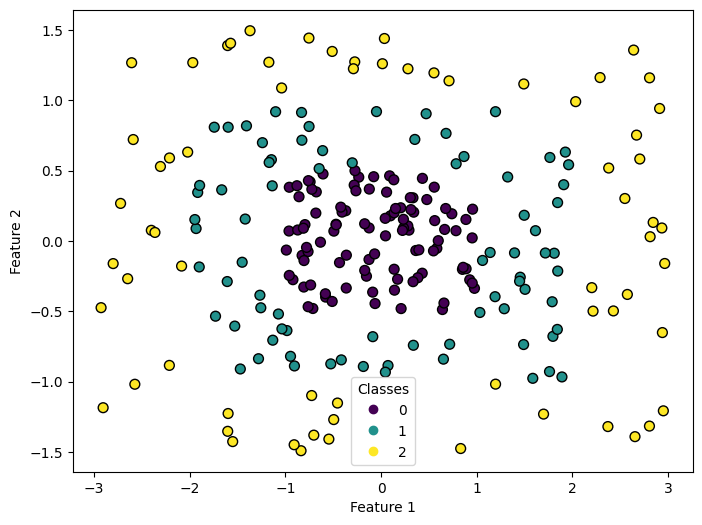

In [376]:
# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

In [377]:
### Your code goes here ####
criterion = nn.NLLLoss()
device = "cuda"

hidden_size = 20
output_size = 3
input_size = 2
model = nn.Sequential(nn.Linear(input_size, 128),
                      nn.ReLU(),
                      nn.Linear(128, 32),
                      nn.ReLU(),
                      nn.Linear(32, output_size),
                      nn.LogSoftmax(dim=1))

model = model.to(device)


opt = optim.Adam(model.parameters(), lr=0.1)

**Model Explanation**

We chose MLP because the data is not distributed in a linear way. We need MLP to create piecewise linear functions.


In [378]:
x_train = pre(X_train)
y_train = pre(y_train).long()
x_test = pre(X_test)
y_test = pre(y_test).long()

In [379]:
num_epochs = 500
model, loss = train(model, x_train, y_train, opt, criterion, num_epochs)

100%|██████████| 500/500 [00:00<00:00, 606.54it/s]


Training accuracy: 1.0


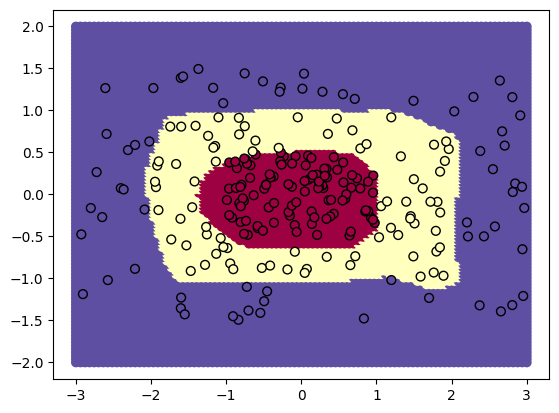

In [380]:
eval_func(model,x_train, y_train, "Training")
pred_and_des(model,x_train, -3, 3, -2 ,2, device)

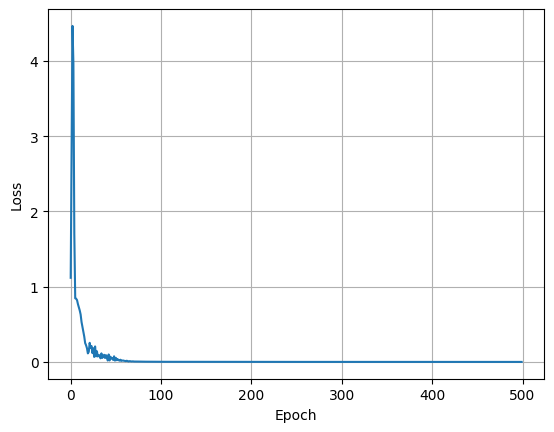

In [381]:
plt_los(loss)

Test accuracy: 0.9432314410480349


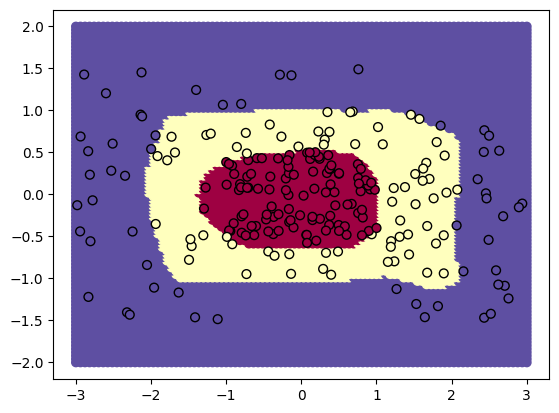

In [382]:
eval_func(model,x_test, y_test, "Test")
pred_and_des(model,x_test, -3, 3, -2 ,2, device)

**Markdown**

Our model performed well. We kept the same parameters as in the previous exercise, because the data is distributed in a similar way – a circular shape. We defined the output size to be 3 because there are 3 different classes for the classification task.


## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

In [383]:
### Your code goes here ####
## Mount google drive ##
from google.colab import drive
drive.mount('/content/gdrive/', force_remount= True)
dir = 'gdrive/My Drive/University/BGU/Year 3 Semester B/Graphical Models Deep Learning/E1/data/'
#dir = 'gdrive/My Drive/GMDL/HW1/'

## load numpy array using np.load() ##
x_train = np.load(dir + "X_train.npy")
x_test = np.load(dir + "X_test.npy")
y_train = np.load(dir + "y_train.npy")
y_test = np.load(dir + "y_test.npy")

Mounted at /content/gdrive/


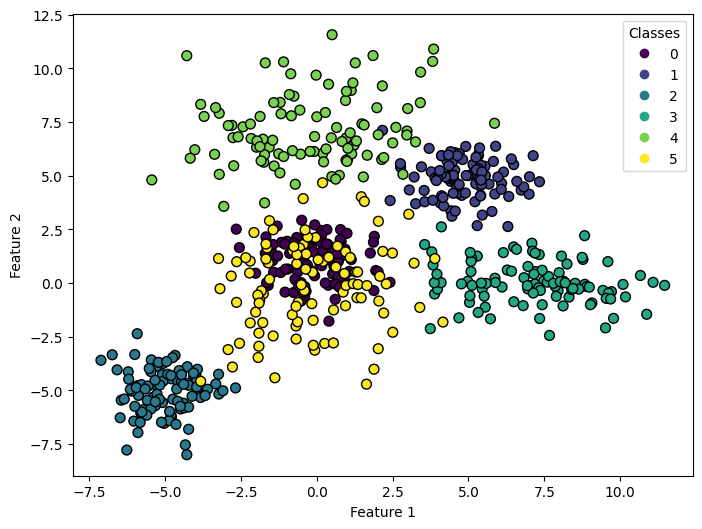

In [384]:
plot_data(x_train, y_train)

In [385]:
x_train = pre(x_train)
y_train = pre(y_train).long()
x_test = pre(x_test)
y_test = pre(y_test).long()

In [386]:
### Your code goes here ####
criterion = nn.NLLLoss()
device = "cuda"

hidden_size = 20
output_size = 6
input_size = 5
model = nn.Sequential(nn.Linear(input_size, 128),
                      nn.ReLU(),
                      nn.Linear(128, 32),
                      nn.ReLU(),
                      nn.Linear(32, output_size),
                      nn.LogSoftmax(dim=1))

model = model.to(device)


opt = optim.Adam(model.parameters(), lr=0.1)

**Model Explanation and Markdown**

 First we plotted the data and noticed there are 6 different classes for the classification task, so we changed the output to 6.
 We printed out the data shape and saw there are 5 features for each instance of the data, so we changed input size to 5. We then constructed an MLP classifier because we couldn’t fully comprehend the structure of the data, except for the fact that it must be piecewise linear. We kept the same parameters (high number of hidden units) and the results were good.

In [387]:
num_epochs = 500
model, loss = train(model, x_train, y_train, opt, criterion, num_epochs)

100%|██████████| 500/500 [00:00<00:00, 562.64it/s]


In [388]:
eval_func(model,x_train, y_train, "Training")
#pred_and_des(model,x_train, -2, 2, -2 ,2, device)

Training accuracy: 1.0


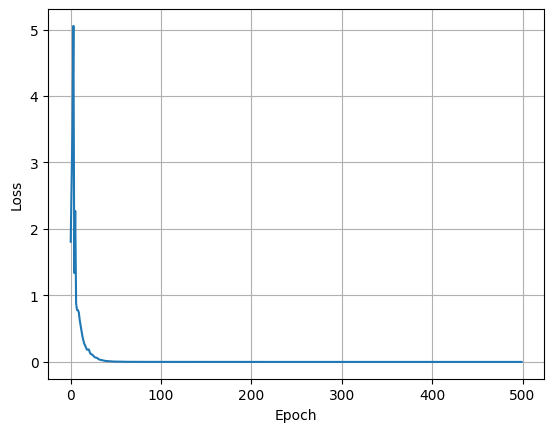

In [389]:
plt_los(loss)

In [390]:
eval_func(model,x_test, y_test, "Test")
# pred_and_des(model,x_test, -2, 2, -2 ,2, device)

Test accuracy: 0.975


#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [391]:
from sklearn.datasets import make_s_curve
### EX7
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX8
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [392]:
### Your code goes here (you may break this part to more than one cell) ####
### Imports
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [393]:
### Preprocessing function ###
def pre(data):
  d = torch.Tensor(data).to("cuda")
  return d


In [394]:
### Evaluation function ###
def eval_func_reg(model, x, y, st):
  y_pred = model(x).detach().cpu().numpy()
  y_target = y.detach().cpu().numpy()
  print(f"{st} MSE Loss: {np.mean((y_pred - y_target) ** 2)}")

In [395]:
### Plot 2's - its always together ###
def plot_s_curve_2(X, y1, y2, title1='S-Curve 1', title2='S-Curve 2'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot the first S-Curve
    scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y1, cmap='viridis', edgecolor='k', s=50)
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].set_title(title1)
    fig.colorbar(scatter1, ax=axes[0], label='Label')

    # Plot the second S-Curve
    scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=y2, cmap='viridis', edgecolor='k', s=50)
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].set_title(title2)
    fig.colorbar(scatter2, ax=axes[1], label='Label')

    plt.show()

def plot_spiral_2(X, y1, y2, title1='Spiral 1', title2='Spiral 2'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot the first Spiral
    scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y1, cmap='viridis', edgecolor='k', s=50)
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].set_title(title1)
    fig.colorbar(scatter1, ax=axes[0], label='Label')

    # Plot the second Spiral
    scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=y2, cmap='viridis', edgecolor='k', s=50)
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].set_title(title2)
    fig.colorbar(scatter2, ax=axes[1], label='Label')

    plt.show()

def plot_spiral_3d_2(X, y1, y2, title1='3D Spiral 1', title2='3D Spiral 2'):
    fig = plt.figure(figsize=(20, 8))

    # Plot the first 3D Spiral
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y1, cmap='viridis', edgecolor='k')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_zlabel('Feature 3')
    ax1.set_title(title1)
    fig.colorbar(scatter1, ax=ax1, label='Label')

    # Plot the second 3D Spiral
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y2, cmap='viridis', edgecolor='k')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_zlabel('Feature 3')
    ax2.set_title(title2)
    fig.colorbar(scatter2, ax=ax2, label='Label')

    plt.show()

In [396]:
def plt_res(model, x, y, f):
  model.eval()
  with torch.no_grad():
    y_pred = model(x).cpu().numpy().squeeze(1)
    y = y.cpu().numpy()
    res = y - y_pred
    x = x.cpu().numpy()
    f(x, res, title= 'Residuals Graph')

In [397]:
def plt_great(model, x, y, st, f):
  model.eval()
  with torch.no_grad():
    y_pred = model(x).cpu().numpy()
    y = y.cpu().numpy()
    x = x.cpu().numpy()
    f(x, y, y_pred, title1= f'Actual {st}', title2= f'Predicted {st}')

## EX6

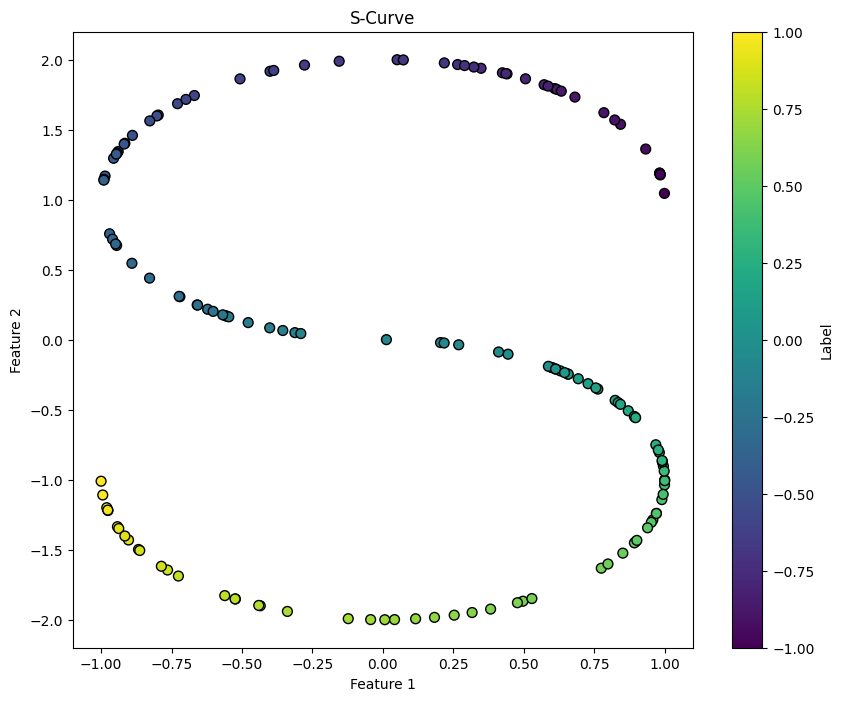

In [398]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

In [399]:
### Your code goes here ####
num_classes = 1
input_size = 2
# What loss function should we use?
criterion = nn.MSELoss()

model = nn.Sequential(nn.Linear(input_size, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Linear(32, num_classes))

# tried with sidmoid 2 layers - was okay but not great. went back to relu with 3 layers this time
opt = optim.Adam(model.parameters(), lr=0.1)

model = model.to(device)

In [400]:
x_train = pre(X_train)
y_train = pre(y_train)
x_test = pre(X_test)
y_test = pre(y_test)

In [401]:
num_epochs = 100
model, loss = train(model, x_train, y_train.view(y_train.shape[0],1), opt, criterion, num_epochs)

100%|██████████| 100/100 [00:00<00:00, 546.87it/s]


Training MSE Loss: 0.6760693788528442


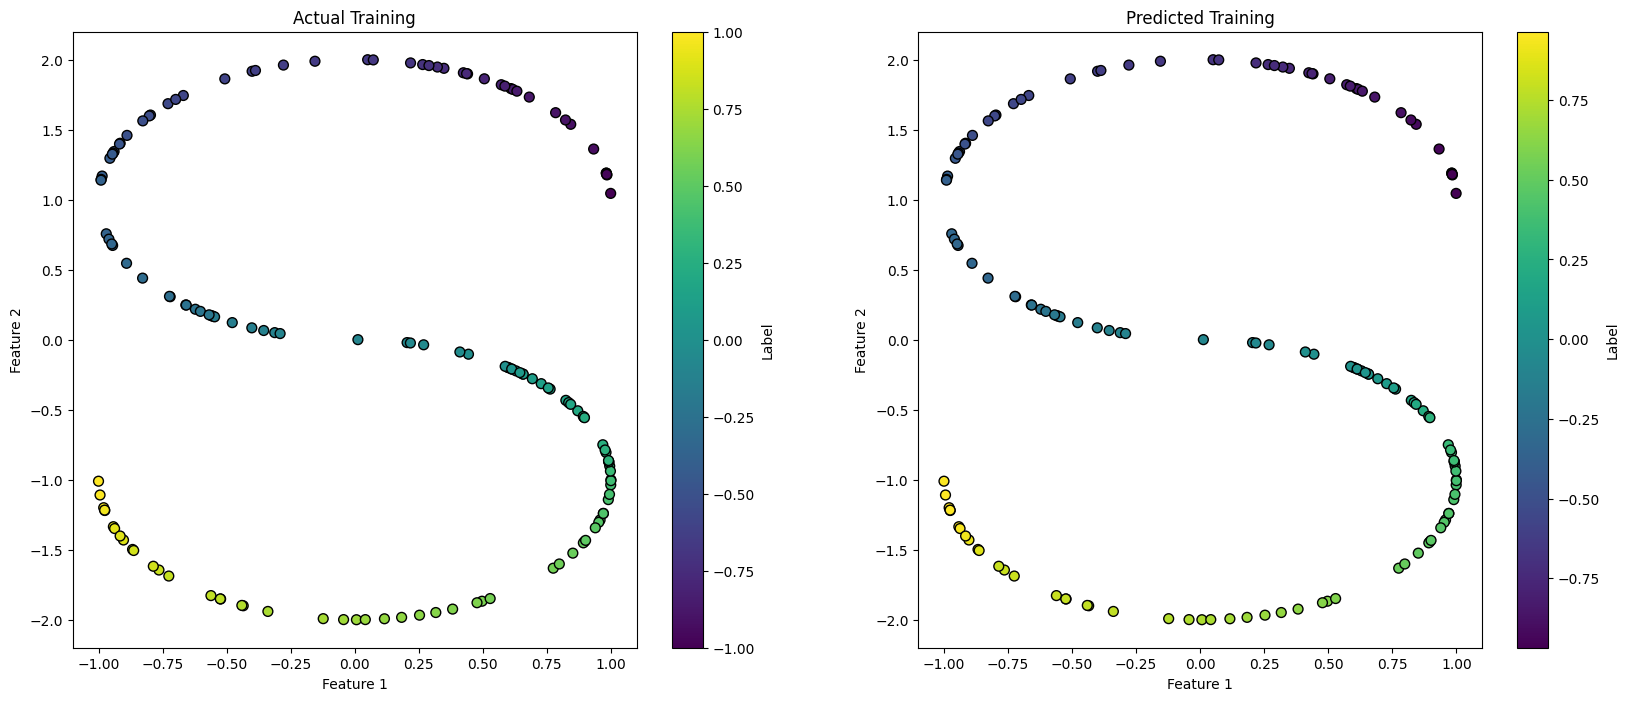

In [402]:
eval_func_reg(model,x_train, y_train, "Training")
plt_great(model,x_train, y_train, "Training", plot_s_curve_2)
#plot_s_curve()

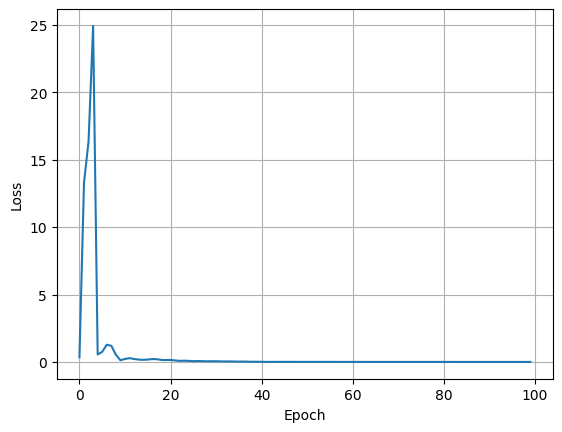

In [403]:
plt_los(loss)

Test MSE Loss: 0.7410053610801697


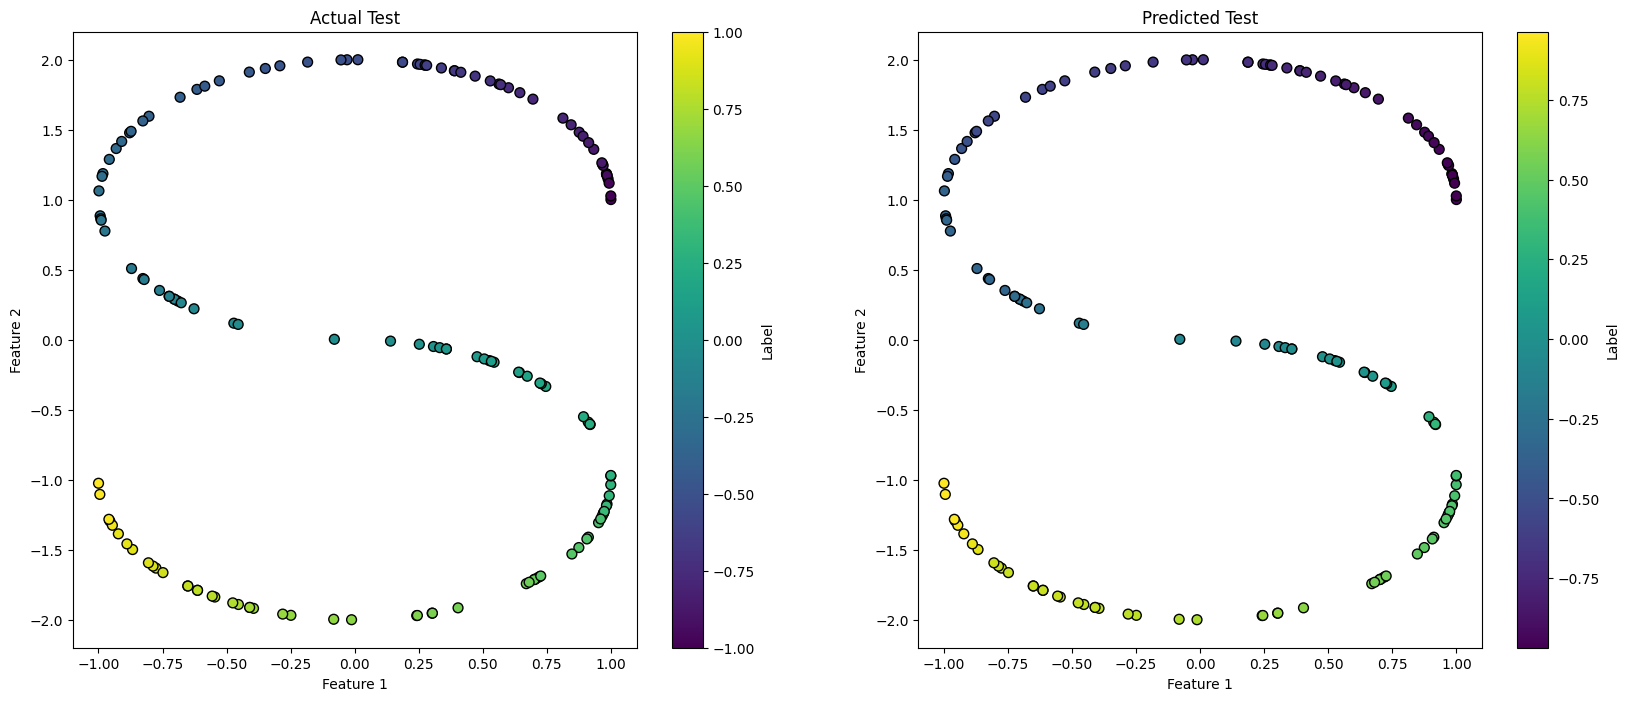

In [404]:
eval_func_reg(model,x_test, y_test, "Test")
plt_great(model,x_test, y_test, "Test", plot_s_curve_2)

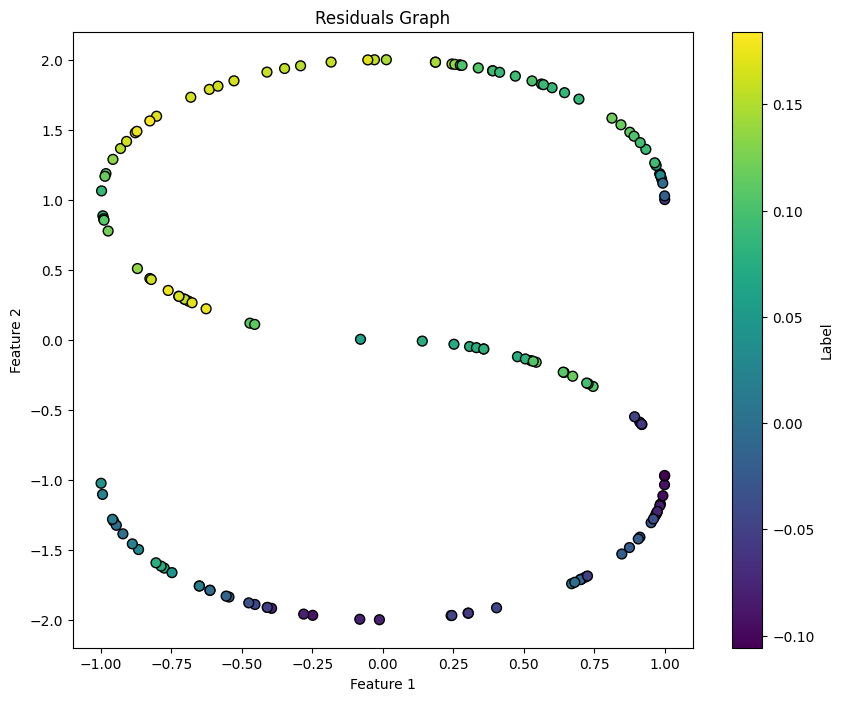

In [405]:
plt_res(model, x_test, y_test, plot_s_curve)

**Markdown**

This is a regression problem, with one dimension output so the output must be set to 1.
 We used MLP and a higher number of hidden units and layers to create an accurate learning curve of the data. These helped the model perform well.


## EX7

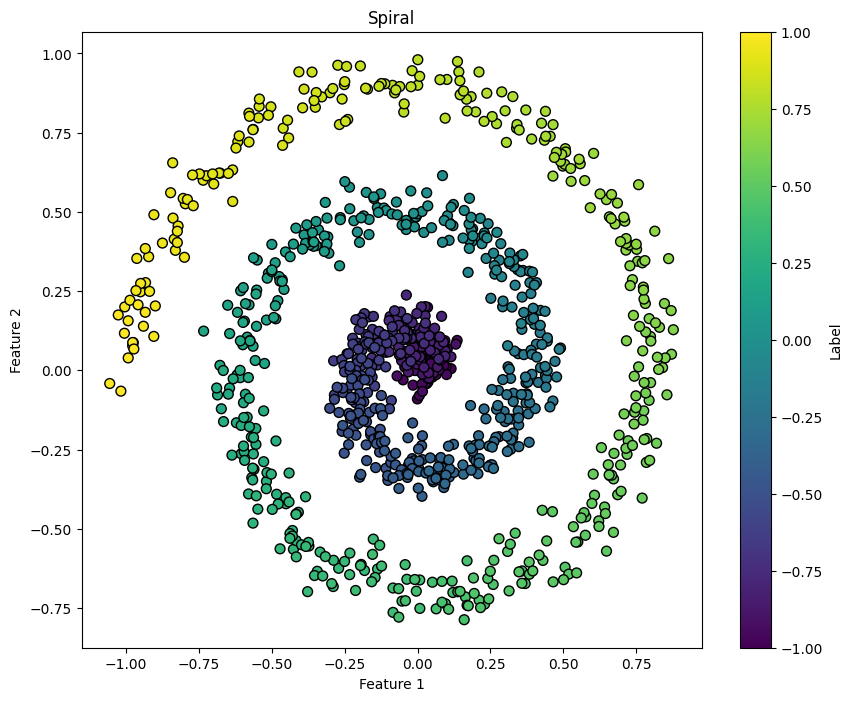

In [406]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)
# Plot the data
plot_spiral(X_train, y_train)


In [407]:
### Your code goes here ####
hidden_size = 20 # was 8
num_classes = 1
input_size = 2
lr = 0.2
# What loss function should we use?
criterion = nn.MSELoss()

model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, num_classes))
# tried with sidmoid 2 layers - was okay but not great. went back to relu with 3 layers this time
opt = optim.SGD(model.parameters(), lr=lr)

model = model.to(device)

In [408]:
x_train = pre(X_train)
y_train = pre(y_train)
x_test = pre(X_test)
y_test = pre(y_test)

In [409]:
num_epochs = 500
model, loss = train(model, x_train, y_train.view(y_train.shape[0],1), opt, criterion, num_epochs)

100%|██████████| 500/500 [00:01<00:00, 440.21it/s]


Training MSE Loss: 0.6589985489845276


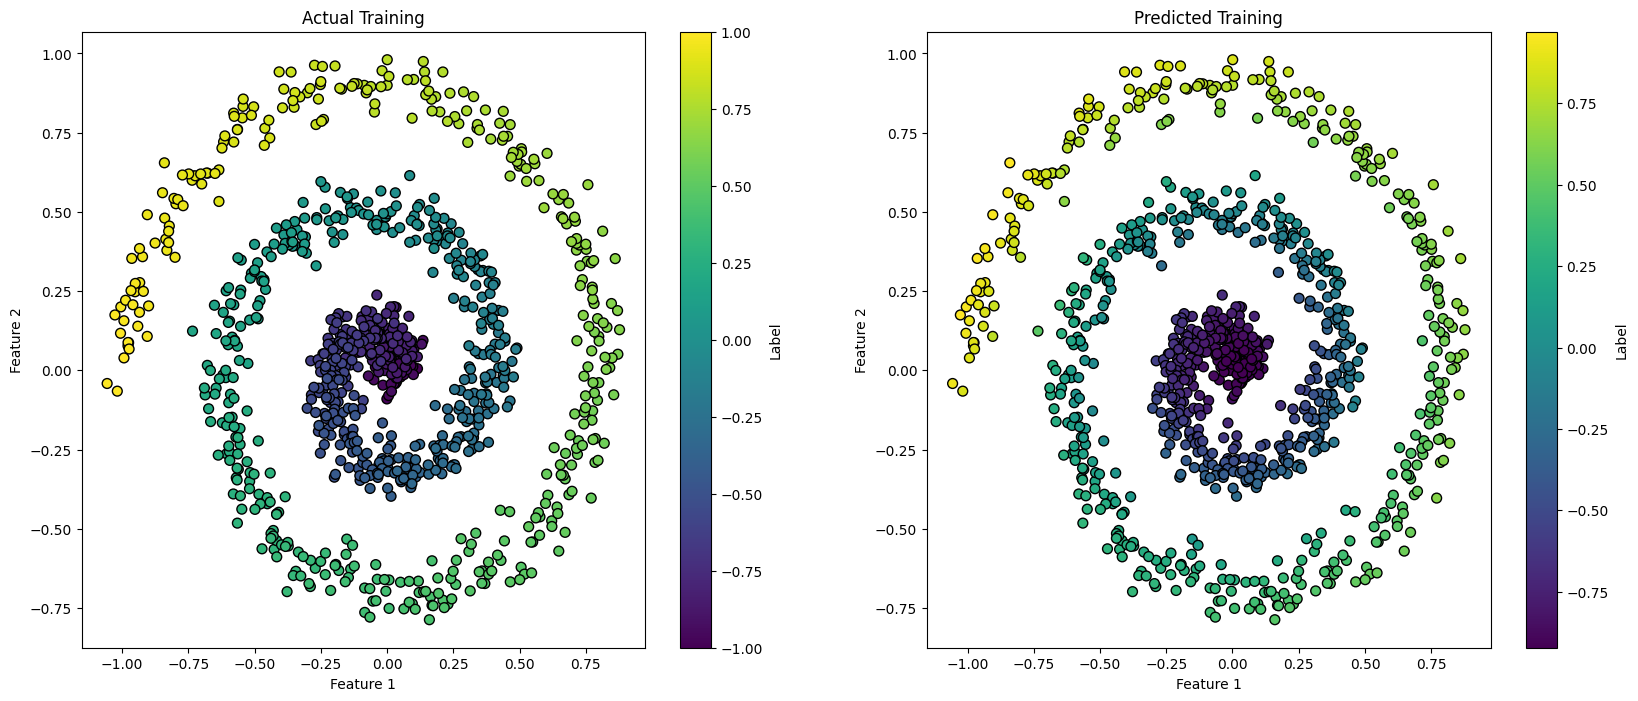

In [410]:
eval_func_reg(model,x_train, y_train, "Training")
plt_great(model,x_train, y_train, "Training", plot_spiral_2)
#plot_s_curve()

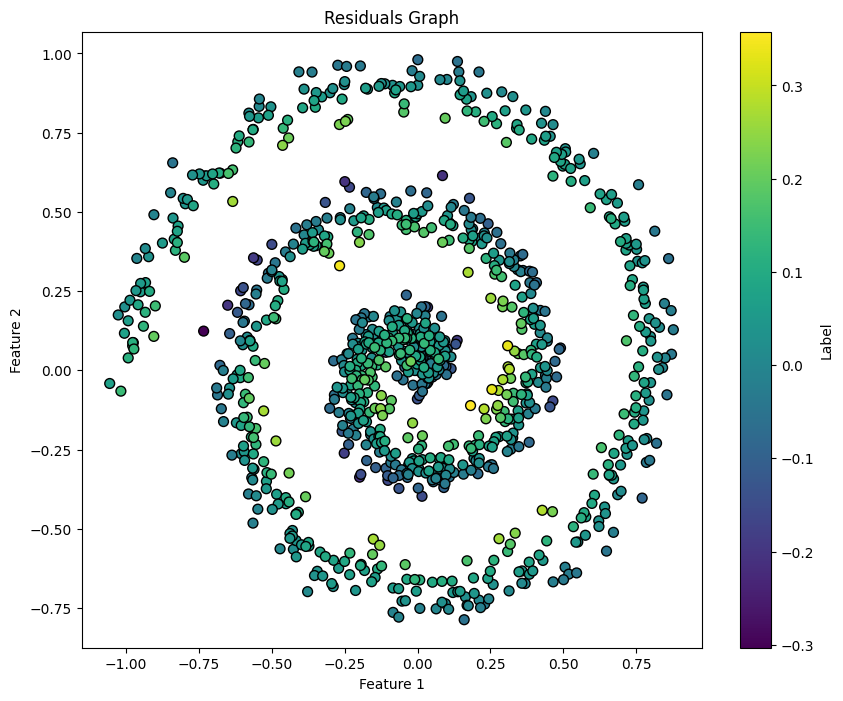

In [411]:
plt_res(model, x_train, y_train, plot_spiral)

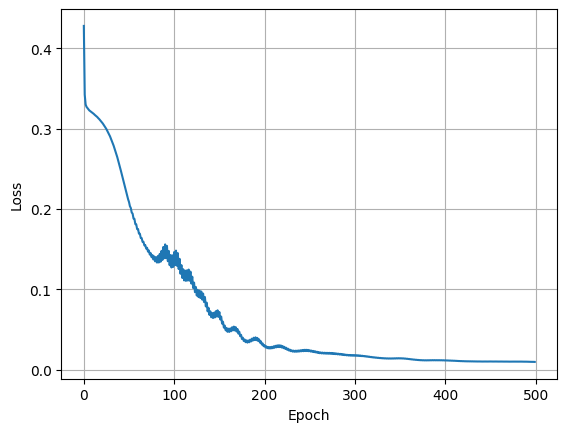

In [412]:
plt_los(loss)

This part was excluded by the course staff

In [413]:
# eval_func_reg(model,x_test, y_test, "Test")
# plt_great(model,x_test, y_test, "Test", plot_spiral_2)

In [414]:
# plt_res(model, x_test, y_test, plot_spiral)

**Markdown**

This is a regression problem, with one dimension output so the output must be set to 1.
 We used MLP and a higher number of hidden units and layers to create an accurate learning curve of the data. After several attempts to find the right combination for the optimizer and lost function, we got to the one used in the code, which performed the best.


## EX8

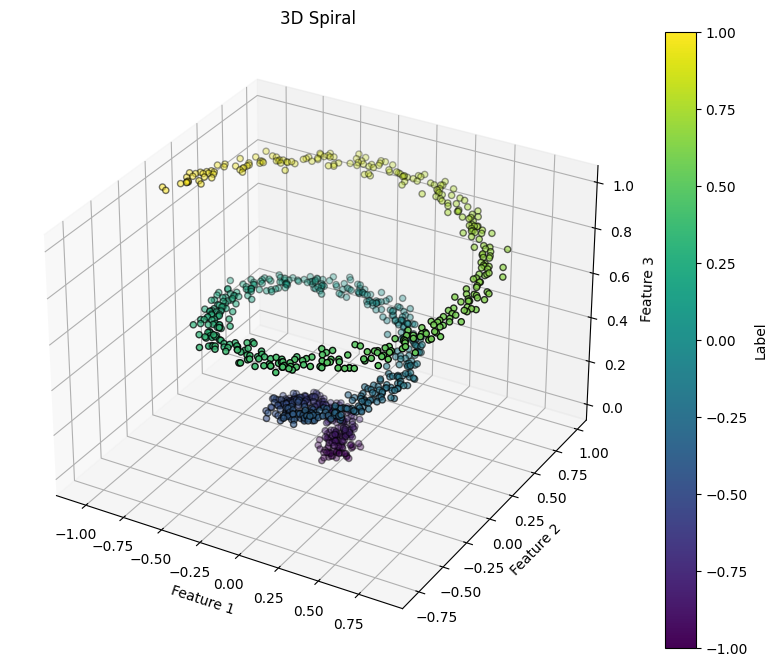

In [415]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

In [416]:
### Your code goes here ####
hidden_size = 20 # was 8
num_classes = 1
input_size = 3
lr = 0.2
# What loss function should we use?
criterion = nn.MSELoss()

model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, num_classes))
# tried with sidmoid 2 layers - was okay but not great. went back to relu with 3 layers this time
opt = optim.SGD(model.parameters(), lr=lr)

model = model.to(device)

In [417]:
x_train = pre(X_train)
y_train = pre(y_train)
x_test = pre(X_test)
y_test = pre(y_test)

In [418]:
num_epochs = 500
model, loss = train(model, x_train, y_train.view(y_train.shape[0],1), opt, criterion, num_epochs)

100%|██████████| 500/500 [00:00<00:00, 527.62it/s]


Training MSE Loss: 0.6671192646026611


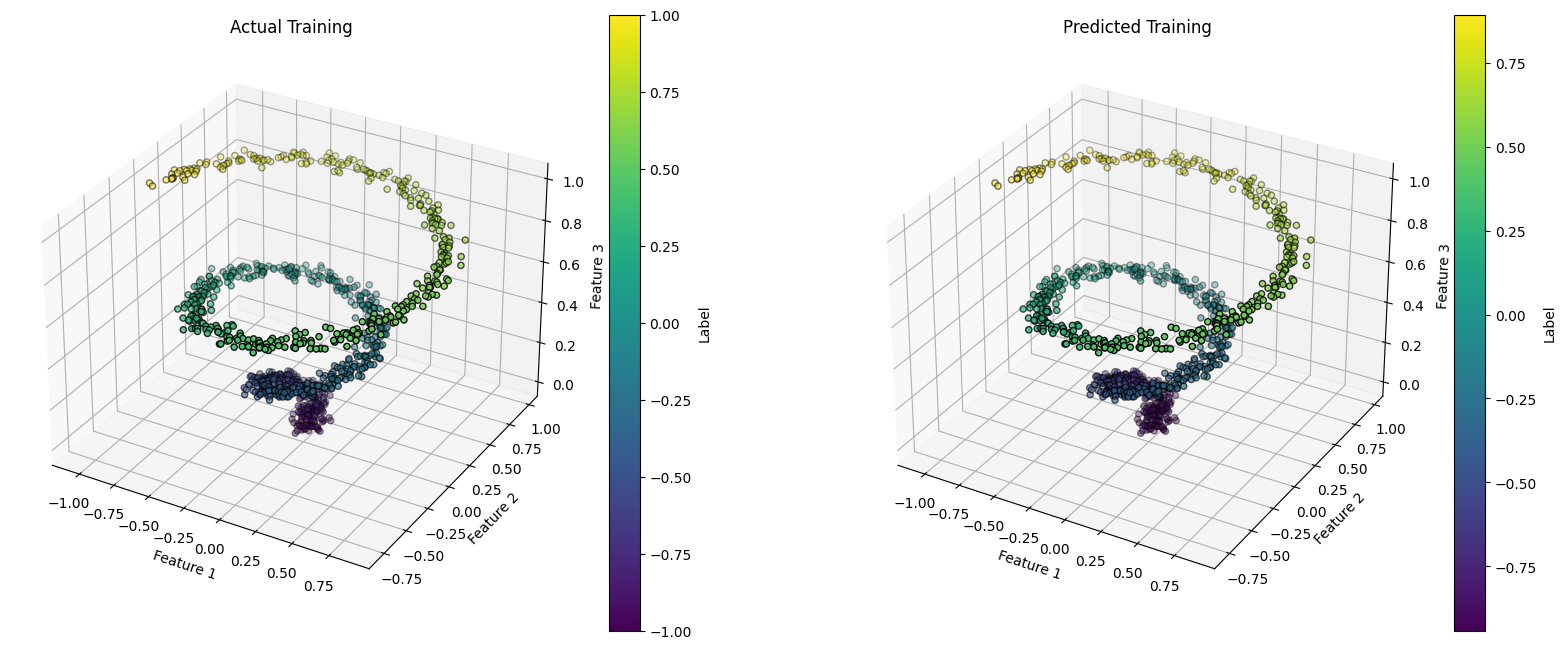

In [419]:
eval_func_reg(model,x_train, y_train, "Training")
plt_great(model,x_train, y_train, "Training", plot_spiral_3d_2)
#plot_s_curve()

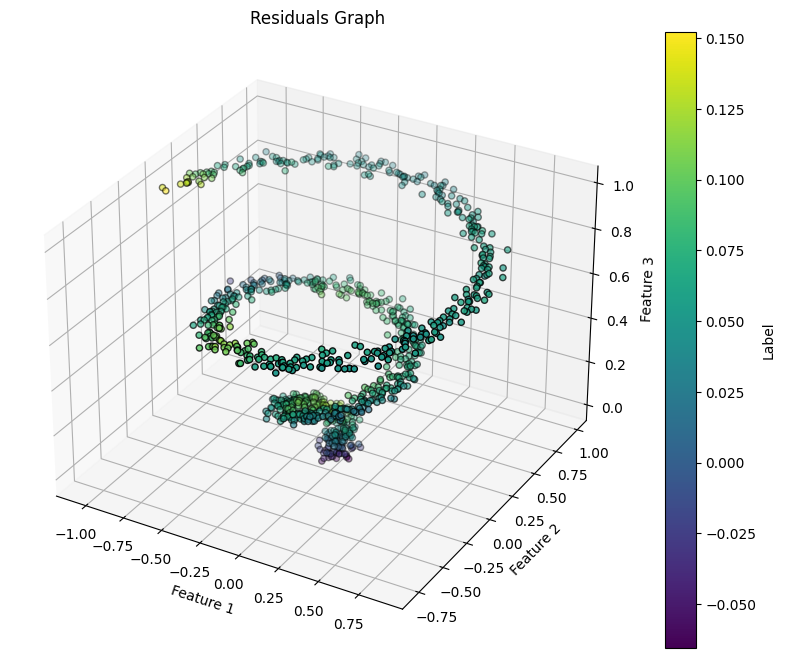

In [420]:
plt_res(model, x_train, y_train, plot_spiral_3d)

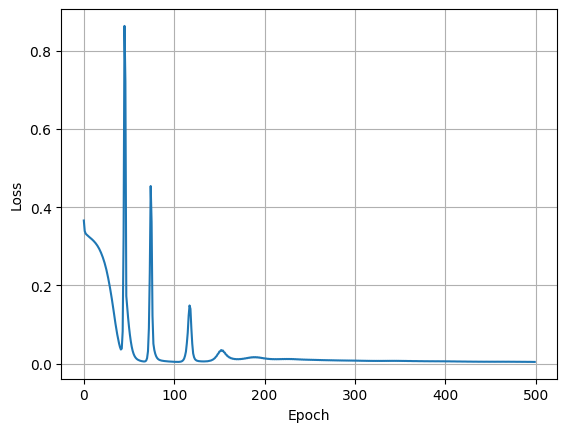

In [421]:
plt_los(loss)

This part was excluded ny the course staff

In [422]:
# eval_func_reg(model,x_test, y_test, "Test")
# plt_great(model,x_test, y_test, "Test", plot_spiral_3d_2)

In [423]:
# plt_res(model, x_test, y_test, plot_spiral_3d)

**Markdown**

This is a regression problem, with one dimension output so the output must be set to 1. We used an identical model to the model from the last clause, because of the similarity in the problems, and it performed well.


# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.

In [424]:
import tensorflow as tf
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Concatenate the training and test sets
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

x = x.reshape(x.shape[0],-1)

# random_subset = np.sort(random.sample(range(10), 2))
random_subset = [0,1]

x = x[np.isin(y, random_subset)]
y = y[np.isin(y, random_subset)]

y[y == random_subset[0]] = 11
y[y == random_subset[1]] = 12

y[y == 11] = 0
y[y == 12] = 1



#y = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), 2)
#print(y)


mnist_mean, mnist_std  = x.mean(), x.std()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mnist_mean, mnist_std)
])

# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])

x_train = torch.transpose(transform(x_train), 0, 1).reshape(x_train.shape[0],-1)
x_val = torch.transpose(transform(x_val), 0, 1).reshape(x_val.shape[0],-1)
x_test = torch.transpose(transform(x_test), 0, 1).reshape(x_test.shape[0],-1)


train_dataset = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
val_dataset = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
test_dataset = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))

<ipython-input-424-05f33ef7c8ef>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
<ipython-input-424-05f33ef7c8ef>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
<ipython-input-424-05f33ef7c8ef>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))


In [425]:
train_batch = 32
val_batch = 64
test_batch = 32


trainloader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=val_batch, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=test_batch, shuffle=True)

In [426]:
def train(model, device, train_loader, optimizer, criterion):
      model.train()
      tmp = 0
      correct = 0
      for j, (data, target) in enumerate(train_loader):
          data, target = data.to(device), target.to(device)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          tmp += loss.item()
          hotmax = torch.argmax(output, dim=1).float()
          correct += hotmax.eq(target.view_as(hotmax)).sum().item()
      return tmp, correct


In [427]:
def eval(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
      for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        #print(torch.all(output[0] == output).item())
        test_loss += criterion(output, target).item()
        hotmax = torch.argmax(output, dim=1).float()
        correct += hotmax.eq(target.view_as(hotmax)).sum().item()
    return test_loss, correct

In [428]:
# The loss function gets output array of size [batch size, classes] and labels array of size [batch size]
output_size = 2
input_size = 784
model = nn.Sequential(nn.Linear(input_size, 2),
                      # nn.ReLU(),
                      # nn.Linear(5, 2),
                      # nn.ReLU(),
                      # nn.Linear(64, 2),
                      # nn.ReLU(),
                      # nn.Linear(64, output_size),
                      nn.LogSoftmax(dim=1)
                      )


criterion = nn.NLLLoss()
device = "cuda"
opt = optim.Adam(model.parameters(), lr= 0.01)
model = model.to(device)


Train Epoch: 10, average loss per pic is 0.0158

Val set: Average loss: 0.0080, Accuracy: 0.6493 (65%)

Train Epoch: 20, average loss per pic is 0.0103

Val set: Average loss: 0.0052, Accuracy: 0.9222 (92%)

Train Epoch: 30, average loss per pic is 0.0072

Val set: Average loss: 0.0035, Accuracy: 0.9961 (100%)

Train Epoch: 40, average loss per pic is 0.0053

Val set: Average loss: 0.0024, Accuracy: 0.9952 (100%)

Train Epoch: 50, average loss per pic is 0.0040

Val set: Average loss: 0.0022, Accuracy: 0.9763 (98%)

Train Epoch: 60, average loss per pic is 0.0034

Val set: Average loss: 0.0023, Accuracy: 0.9643 (96%)

Train Epoch: 70, average loss per pic is 0.0028

Val set: Average loss: 0.0012, Accuracy: 0.9952 (100%)

Train Epoch: 80, average loss per pic is 0.0022

Val set: Average loss: 0.0013, Accuracy: 0.9952 (100%)

Train Epoch: 90, average loss per pic is 0.0019

Val set: Average loss: 0.0009, Accuracy: 0.9971 (100%)



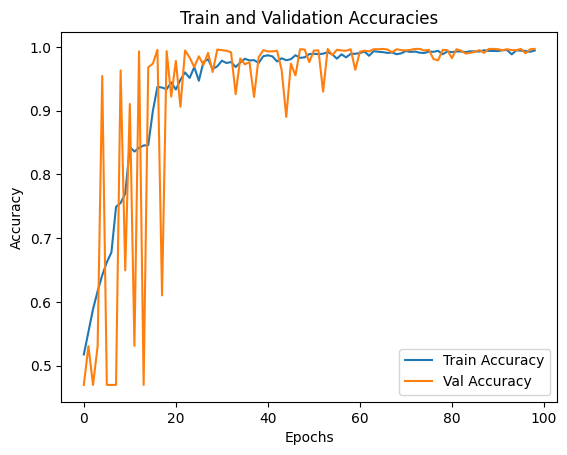

In [429]:
nume = 100
val_acc = []
train_acc = []

for i in range(1, nume):
  train_loss, correct_train = train(model, device, trainloader, opt, criterion)
  val_loss, correct_val = eval(model, device, valloader, criterion)
  avg_loss_train = train_loss/ len(trainloader.dataset)
  avg_acc_train = correct_train / len(trainloader.dataset)
  avg_loss_val = val_loss/ len(valloader.dataset)
  avg_acc_val = correct_val/ len(valloader.dataset)
  val_acc.append(avg_acc_val)
  train_acc.append(avg_acc_train)
  if i % 10 == 0:
    print(f'Train Epoch: {i}, average loss per pic is {avg_loss_train:.4f}')
    print(f'\nVal set: Average loss: {avg_loss_val:.4f}, Accuracy: {avg_acc_val:.4f} ({100. * correct_val / len(valloader.dataset):.0f}%)\n')

fig, ax = plt.subplots()

# Plot data
ax.plot(train_acc, label='Train Accuracy')
ax.plot(val_acc, label='Val Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Validation Accuracies')
ax.legend()

# Display the plot
plt.show()

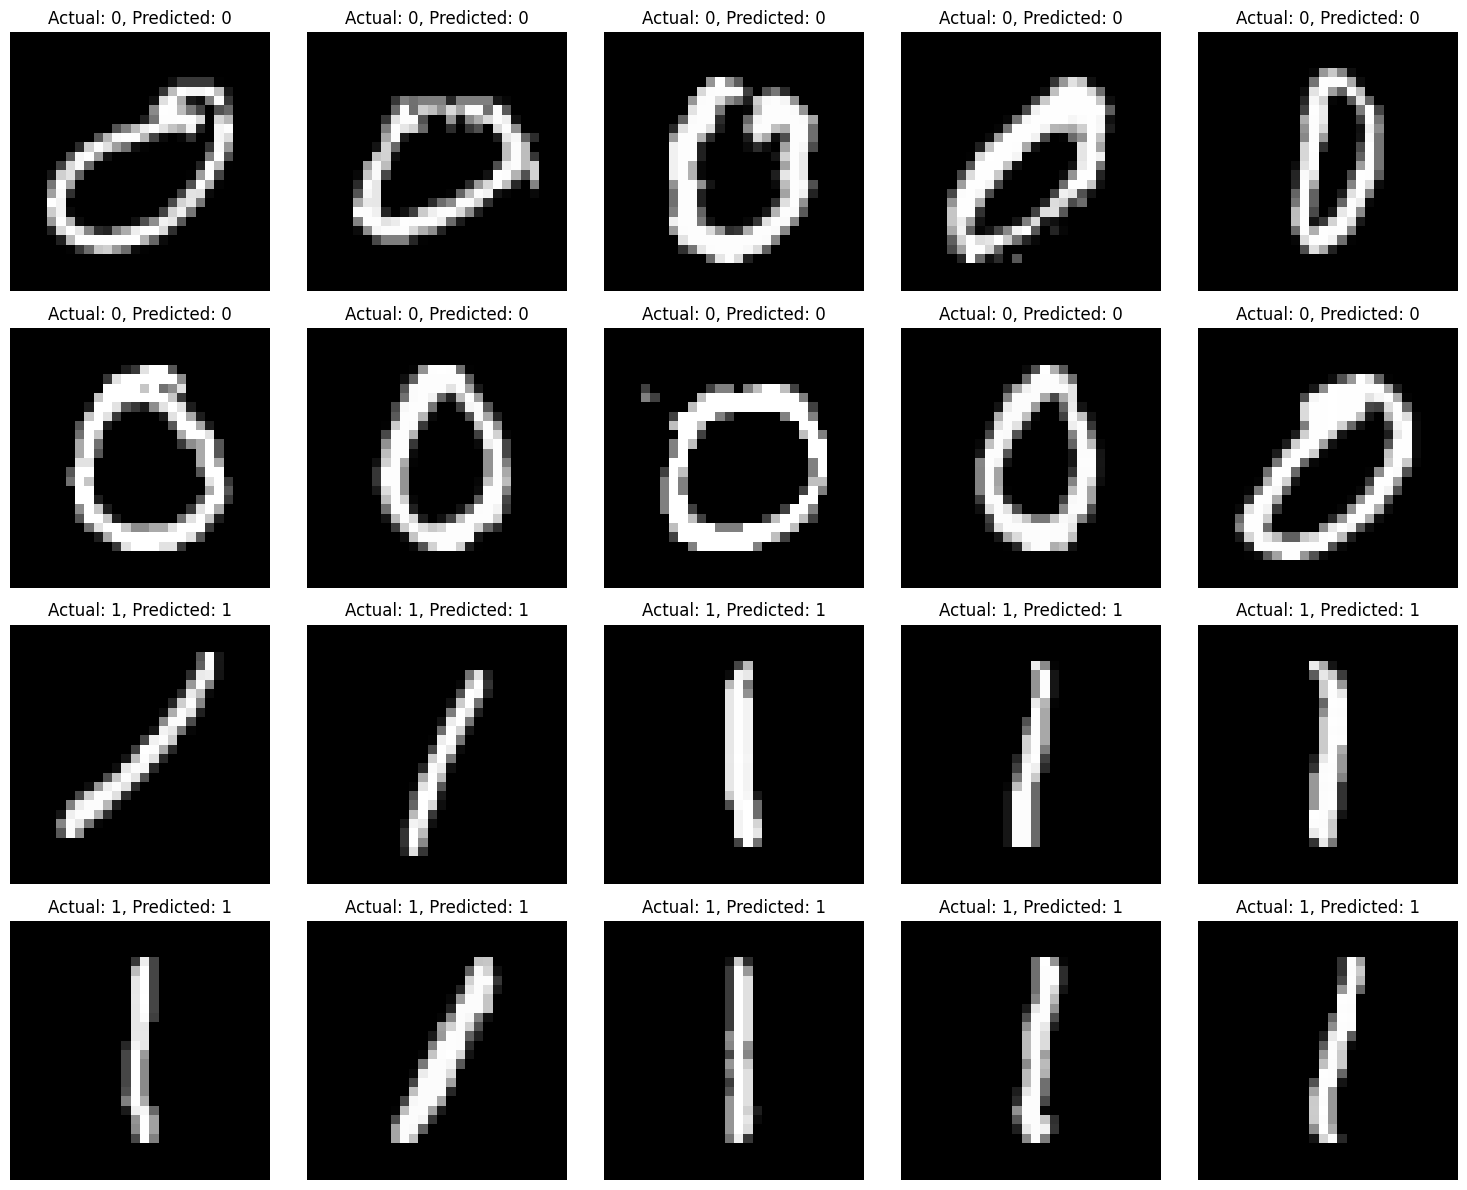

In [430]:
c1 = x_test.numpy()
c1 = c1[np.where(y_test == 0)[0],:]
c1 = c1[np.random.choice(c1.shape[0], 10, replace=False)]

c2 = x_test.numpy()
c2 = c2[np.where(y_test == 1)[0],:]
c2 = c2[np.random.choice(c2.shape[0], 10, replace=False)]

c1t = torch.tensor(c1)
c2t = torch.tensor(c2)
t1 = torch.zeros(10)
t2 = torch.ones(10)
c1t, c2t, t1, t2 = c1t.to(device), c2t.to(device), t1.to(device),t2.to(device)
with torch.no_grad():
  o1 = model(c1t)
  o2 = model(c2t)
  hot1 = torch.argmax(o1, dim=1).float()
  hot2 = torch.argmax(o2, dim=1).float()

c = torch.cat((c1t,c2t), dim=0).cpu()
l = torch.cat((t1,t2), dim=0).cpu()
o = torch.cat((hot1,hot2), dim=0).cpu()
# Number of images
num_images = 20

# Number of columns for the plot (you can adjust this)
num_cols = 5
num_rows = num_images // num_cols + (num_images % num_cols != 0)

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()
for i in range(num_images):
    # Reshape the flattened MNIST data to 28x28
    img = c[i].reshape(28, 28)

    # Display the image
    axes[i].imshow(img, cmap='gray')

    # Set the title with actual and predicted labels
    axes[i].set_title(f"Actual: {random_subset[int(l[i])]}, Predicted: {random_subset[int(o[i])]}")

    # Hide the axes
    axes[i].axis('off')

# Hide any remaining axes if num_images < num_rows * num_cols
for i in range(num_images, num_rows * num_cols):
    axes[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [431]:
correct = 0
with torch.no_grad():
      for data, target in testloader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        hotmax = torch.argmax(output, dim=1).float()
        correct += hotmax.eq(target.view_as(hotmax)).sum().item()
print(f"The test set average accuracy is: {100*correct / len(testloader.dataset):.3f}%")

The test set average accuracy is: 99.797%


**Hyperparameters**
1. Model: Linear model – this was more familiar to us and for some reason performed better for us than MLP.
2. Number of layers, number of neurons- We saw that by adding a layer, the model doesn’t learn well, and the loss doesn’t decrease, so we kept it linear.
3. Number of epochs (between 10-100) – 100 epochs to give the model more iterations to learn
4. Learning rate - after many tests we found that the best learning rate for out model is 0.01
5. Loss function – we used negative log likelihood loss because we found it was the best at classifying MNIST.
6. Activation function – we don’t have an activation function because we have used a linear model.


**Discussion**
*   Convergence - our model converged as one can see in the result, and was successful in classifying the images of 0 and 1.
*   Overfit - the model did not overfit as you can see in the results on the validation dataset and the test dataset, which are independent to the train set.
*   Difference from Toy examples - the main difference from the toy examples is the dimension in the MNIST problem, which was 784 against at most 5 features in the toy examples.
*   Overall impressions - The task was both interesting and challenging, we had to learn to use the different packages, and through trial and error find the best hyperparameters for model to the different sections.



